In [1]:
!pip install tensorflow

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached charset_normalizer-3.4.4-cp310-cp310-win_amd64.whl.metadata (38 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6.9 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached markupsafe-3.0.3-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.7 MB 4.8 MB/s eta 0:01:10
   ---------------------------------------- 2.1/331.7 MB 5.3 MB/s eta 0:01:02
   ---------------------------------------- 3.1/331.7 MB 5.0 MB/s eta 0:01:06
    --------------------------------------- 4.2/331.7 MB 5.0 MB/s eta 0:01:06
    --------------------------------------- 5.2/331.7 MB 5.0 MB/s eta 0:01:06
    --------------------------------------- 6.3/331.7

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report


img_size = 224
batch_size = 32
epochs = 10
train_dir = "dataset/TRAIN"
test_dir = "dataset/TEST"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [4]:
def build_model(base_model):
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [5]:
def train_model(model, name):
    callbacks = [
        EarlyStopping(patience=3, restore_best_weights=True),
        ModelCheckpoint(f"{name}_best.h5", save_best_only=True)
    ]
    
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=callbacks
    )
    
    return history

In [6]:
mobilenet_base = MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)

mobilenet_model = build_model(mobilenet_base)
history_m = train_model(mobilenet_model, "mobilenet")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.8165 - loss: 0.3918

565/565 ━━━━━━━━━━━━━━━━━━━━ 600s 1s/step - accuracy: 0.8793 - loss: 0.2927 - val_accuracy: 0.9258 - val_loss: 0.2052
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.9208 - loss: 0.2075

565/565 ━━━━━━━━━━━━━━━━━━━━ 416s 736ms/step - accuracy: 0.9222 - loss: 0.2042 - val_accuracy: 0.9337 - val_loss: 0.1842
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.9306 - loss: 0.1797

565/565 ━━━━━━━━━━━━━━━━━━━━ 427s 757ms/step - accuracy: 0.9310 - loss: 0.1828 - val_accuracy: 0.9342 - val_loss: 0.1830
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.9349 - loss: 0.1727

565/565 ━━━━━━━━━━━━━━━━━━━━ 419s 742ms/step - accuracy: 0.9355 - loss: 0.1696 - val_accuracy: 0.9399 - val_loss: 0.1684
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 417s 737ms/step - accuracy: 0.9385 - loss: 0.1617 - val_accuracy: 0.9355 - val_loss: 0.1725
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 417s 738ms/step - accuracy: 0.9418 - loss: 0.1524 - val_accuracy: 0.9351 - val_loss: 0.1781
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.9467 - loss: 0.1450

565/565 ━━━━━━━━━━━━━━━━━━━━ 414s 733ms/step - accuracy: 0.9466 - loss: 0.1441 - val_accuracy: 0.9384 - val_loss: 0.1647
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 413s 731ms/step - accuracy: 0.9484 - loss: 0.1371 - val_accuracy: 0.9388 - val_loss: 0.1656
Epoch 9/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9520 - loss: 0.1254

565/565 ━━━━━━━━━━━━━━━━━━━━ 415s 735ms/step - accuracy: 0.9498 - loss: 0.1332 - val_accuracy: 0.9366 - val_loss: 0.1647
Epoch 10/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 415s 734ms/step - accuracy: 0.9525 - loss: 0.1269 - val_accuracy: 0.9386 - val_loss: 0.1665


In [7]:
efficientnet_base = EfficientNetB0(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)

efficientnet_model = build_model(efficientnet_base)
history_e = train_model(efficientnet_model, "efficientnet")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.5412 - loss: 0.6925

565/565 ━━━━━━━━━━━━━━━━━━━━ 496s 867ms/step - accuracy: 0.5466 - loss: 0.6903 - val_accuracy: 0.5570 - val_loss: 0.6898
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.5522 - loss: 0.6883

565/565 ━━━━━━━━━━━━━━━━━━━━ 487s 863ms/step - accuracy: 0.5563 - loss: 0.6875 - val_accuracy: 0.5570 - val_loss: 0.6868
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.5599 - loss: 0.6869

565/565 ━━━━━━━━━━━━━━━━━━━━ 487s 862ms/step - accuracy: 0.5566 - loss: 0.6875 - val_accuracy: 0.5570 - val_loss: 0.6866
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 489s 866ms/step - accuracy: 0.5567 - loss: 0.6874 - val_accuracy: 0.5570 - val_loss: 0.6868
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 486s 861ms/step - accuracy: 0.5568 - loss: 0.6875 - val_accuracy: 0.5570 - val_loss: 0.6867
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 486s 861ms/step - accuracy: 0.5568 - loss: 0.6875 - val_accuracy: 0.5570 - val_loss: 0.6867


In [8]:
m_loss, m_acc = mobilenet_model.evaluate(test_gen)
e_loss, e_acc = efficientnet_model.evaluate(test_gen)

print("MobileNet Test Accuracy:", m_acc)
print("EfficientNet Test Accuracy:", e_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 51s 649ms/step - accuracy: 0.9009 - loss: 0.2545
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 586ms/step - accuracy: 0.5575 - loss: 0.6862
MobileNet Test Accuracy: 0.900915265083313
EfficientNet Test Accuracy: 0.5575010180473328


In [18]:
if m_acc > e_acc:
    best_model = mobilenet_model
    best_model.save("best_model.h5")
else:
    best_model = efficientnet_model
    best_model.save("best_model.h5")

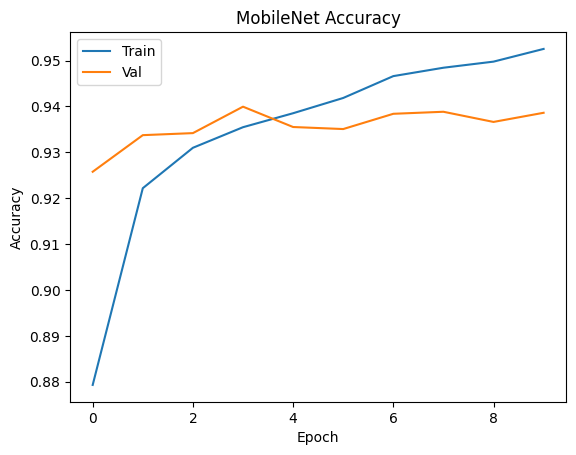

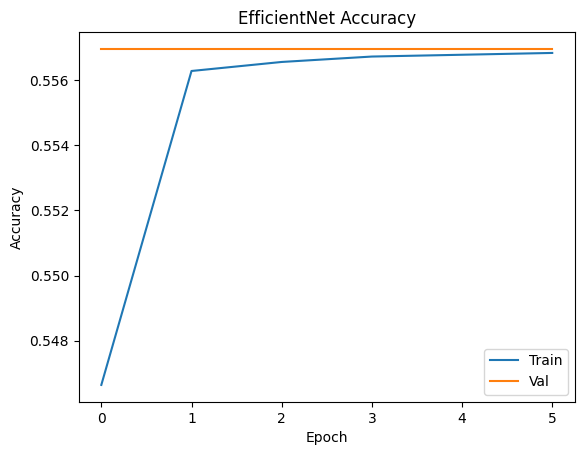

In [10]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

plot_history(history_m, "MobileNet Accuracy")
plot_history(history_e, "EfficientNet Accuracy")

In [11]:
y_true = test_gen.classes
y_pred_prob = best_model.predict(test_gen)
y_pred = (y_pred_prob > 0.5).astype("int32").reshape(-1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 472ms/step


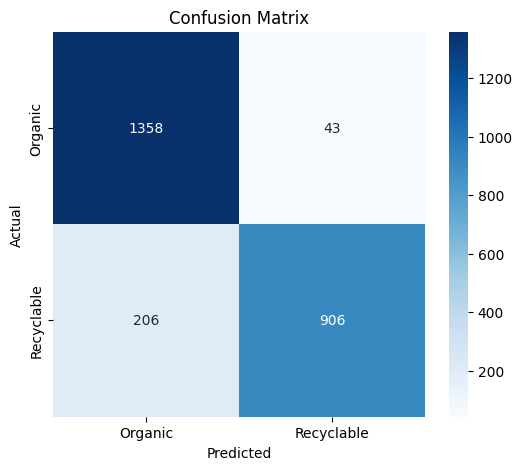

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Organic", "Recyclable"],
            yticklabels=["Organic", "Recyclable"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Test Set")
plt.show()

In [17]:
report = classification_report(
    y_true,
    y_pred,
    target_names=["Organic", "Recyclable"]
)

print(report)

              precision    recall  f1-score   support

     Organic       0.87      0.97      0.92      1401
  Recyclable       0.95      0.81      0.88      1112

    accuracy                           0.90      2513
   macro avg       0.91      0.89      0.90      2513
weighted avg       0.91      0.90      0.90      2513

